# data generation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

L = []
R = []
s = 1; t = 1
while s < 11 or t < 11:
    (x, y, z) = (np.random.normal(0,100), np.random.normal(0,100), np.random.normal(0,100))
    if (x + y + z) > 0:
        if s < 11:
            R.append((x, y, z, 1))
            s = s + 1
    if (x + y + z) <= 0:
        if t < 11:
            L.append((x, y, z, 0))
            t = t + 1

data1 = pd.DataFrame(R)
data2 = pd.DataFrame(L)

D = R + L

data = pd.DataFrame(D)


np.shape(data)
data



,0,1,2,3
0,81.000214,22.500531,119.662967,1
1,60.785876,21.442397,167.855612,1
2,-92.386828,210.040346,99.043678,1
3,55.043029,-6.557487,143.892463,1
4,93.339496,-24.800229,36.297949,1
5,-37.079222,132.097318,-27.137721,1
6,95.191856,73.534404,69.712878,1
7,-63.945956,34.682839,103.973691,1
8,132.531815,30.887039,-42.848371,1
9,-135.975527,66.645475,125.000727,1


# plotting the generated data and X + Y + Z = 1

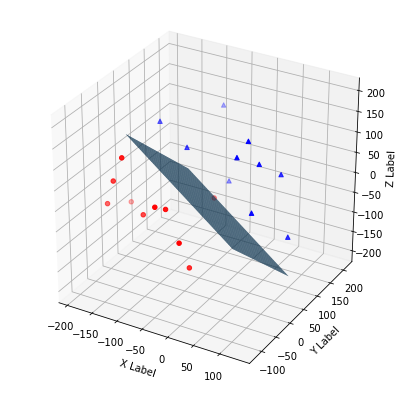

In [3]:
fig = plt.figure(figsize =(7,7))
ax = plt.axes(projection='3d')
zdata = data1.loc[:, 2]
xdata = data1.loc[:, 0]
ydata = data1.loc[:, 1]


zdata1 = data2.loc[:, 2]
xdata1 = data2.loc[:, 0]
ydata1 = data2.loc[:, 1]

ax.scatter(xdata, ydata, zdata, c='b', marker='^')
ax.scatter(xdata1, ydata1, zdata1, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
X,Y = np.meshgrid(x,y)

Z = -(X+Y-1)
surf1 = ax.plot_surface(X, Y, Z)


plt.show()


######  Log likelyhood function 
l($\beta$)  = $\sum_{i=1}^{p} (y_{i} log(p(x_{i}; \beta)) + (1-y_{i}) log(1-p(x_{i}; \beta))$

### Gradient
$\frac{\partial l(\beta)}{\partial \beta_{j}}$ = $\sum_{i=1}^{p} x_{i}^{(j)}(y_{i} - p(x_{i}; \beta))$ 

### Hessian
$\frac{\partial^{2} l(\beta)}{\partial \beta_{j} \partial \beta_{k}}$ = -$\sum_{i=1}^{p} x_{i}^{(j)} x_{i}^{(k)} p(x_{i}; \beta)[1-p(x_{i}; \beta)]$ 

In [4]:
def sigmoied(z):
    f=1/(1+np.exp(-z))
    return f

#probability function
def p(x, beta):
    n = np.shape(beta)[0]
    m = np.shape(x)[0]
    
    if(m == n):
        z = 1
        for i in range(n):
            z = z + (beta[i]* x[i])
        return sigmoied(z)
    else: print("error")
        
def l_beta(data, beta):
    m = np.shape(data)[0]
    z = 0
    for i in range(m):
        x=(data[0][i], data[1][i], data[2][i])
        y = data[3][i]
        z = z + (y*np.log(p(x, beta))) + ((1-y)*np.log(1-p(x, beta)))
    return z

def  gradient_l_beta(data, beta):
    n = np.shape(beta)[0]
    m = np.shape(data)[0]
    delta = np.zeros(n)

    for j in range(n):
        z = 0
        for i in range(m):
            x=(data[0][i], data[1][i], data[2][i])
            y = data[3][i]
            z = z + (x[j]*(y - p(x, beta)))
        delta[j] = z     
    return delta

def hessian_l_beta(data, beta):
    n = np.shape(beta)[0]
    m = np.shape(data)[0]
    hessian = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z=0
            for k in range(m):
                x=(data[0][k], data[1][k], data[2][k])
                y = data[3][k]
                z = z + (x[i]*x[j]*( -p(x, beta)*(1-p(x, beta))))
            hessian[i][j] = z
     
    return hessian

          

array([[-7.75286327e-05,  1.58641556e-04, -8.91129466e-05],
       [ 1.58641556e-04, -3.24617401e-04,  1.82345748e-04],
       [-8.91129466e-05,  1.82345748e-04, -1.02428186e-04]])

# updating $\beta$

$\beta_{new} = \beta_{old} - ((\frac{\partial^{2} l(\beta)}{\partial \beta_{j} \partial \beta_{k}})^{-1} \frac{\partial l(\beta)}{\partial \beta_{j}})_{|\beta_{old}}  $

In [5]:
# Newton's Raphson's method for updating beta values l(beta)

def logistic_regression(data, iterations):
    n = np.shape(data)[0]
    m = np.shape(data)[1] -1
    beta = np.zeros(m)
    e=[]
    f=[]
    for i in range(m):
        beta[i] = i/1000
    
    
    beta_old = beta
    A = hessian_l_beta(data, beta_old)
    
    t = np.linalg.det(A)
    
    j=0
    while(t!=0 and j<iterations):
        l = l_beta(data, beta_old)
        Ainv= np.linalg.inv(A)
        B = gradient_l_beta(data, beta_old)
        beta_new = np.array(beta_old) - np.array(B @ Ainv)
        beta_old = beta_new
        f.append(j)
        e.append(l)
        j = j+1
        A = hessian_l_beta(data, beta_old)
        t = np.linalg.det(A)
        
    
               
    beta = beta_old
       
    
    
    return beta, e, f
        
        

In [6]:
beta, cost, steps= logistic_regression(data, 100)


<ipython-input-4-9376a13e65c6>:23: RuntimeWarning: divide by zero encountered in log
  z = z + (y*np.log(p(x, beta))) + ((1-y)*np.log(1-p(x, beta)))
<ipython-input-4-9376a13e65c6>:23: RuntimeWarning: invalid value encountered in multiply
  z = z + (y*np.log(p(x, beta))) + ((1-y)*np.log(1-p(x, beta)))


### plotting the data along with logistic regression classifier

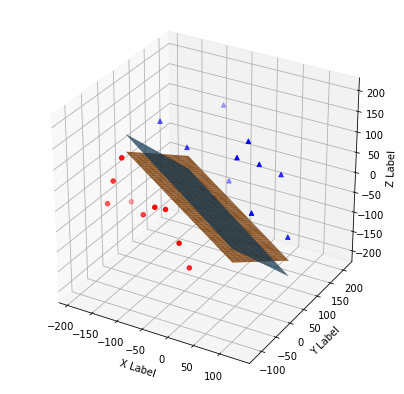

In [7]:
fig = plt.figure(figsize =(7,7))
ax = plt.axes(projection='3d')
zdata = data1.loc[:, 2]
xdata = data1.loc[:, 0]
ydata = data1.loc[:, 1]


zdata1 = data2.loc[:, 2]
xdata1 = data2.loc[:, 0]
ydata1 = data2.loc[:, 1]

ax.scatter(xdata, ydata, zdata, c='b', marker='^')
ax.scatter(xdata1, ydata1, zdata1, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
X,Y = np.meshgrid(x,y)

Z = -(X+Y-1)
surf1 = ax.plot_surface(X, Y, Z)
Z = -((X*beta[0])+(Y*beta[1])-1)/beta[2]
surf2 = ax.plot_surface(X, Y, Z)


plt.show()